═══════════════════════════════════════════
            OPTION PREMIUMS
═══════════════════════════════════════════
Call 2.70: 0.0657 CNY
Call 2.75: 0.0315 CNY
Call 2.80: 0.0113 CNY
Call 2.85: 0.0100 CNY
Put 2.65: 0.0100 CNY
Put 2.70: 0.0100 CNY
Put 2.75: 0.0225 CNY
Put 2.80: 0.0521 CNY


/var/folders/w7/xssdnkmn1jz6m2lklw2bfzvc0000gn/T/ipykernel_15370/663603894.py:169: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


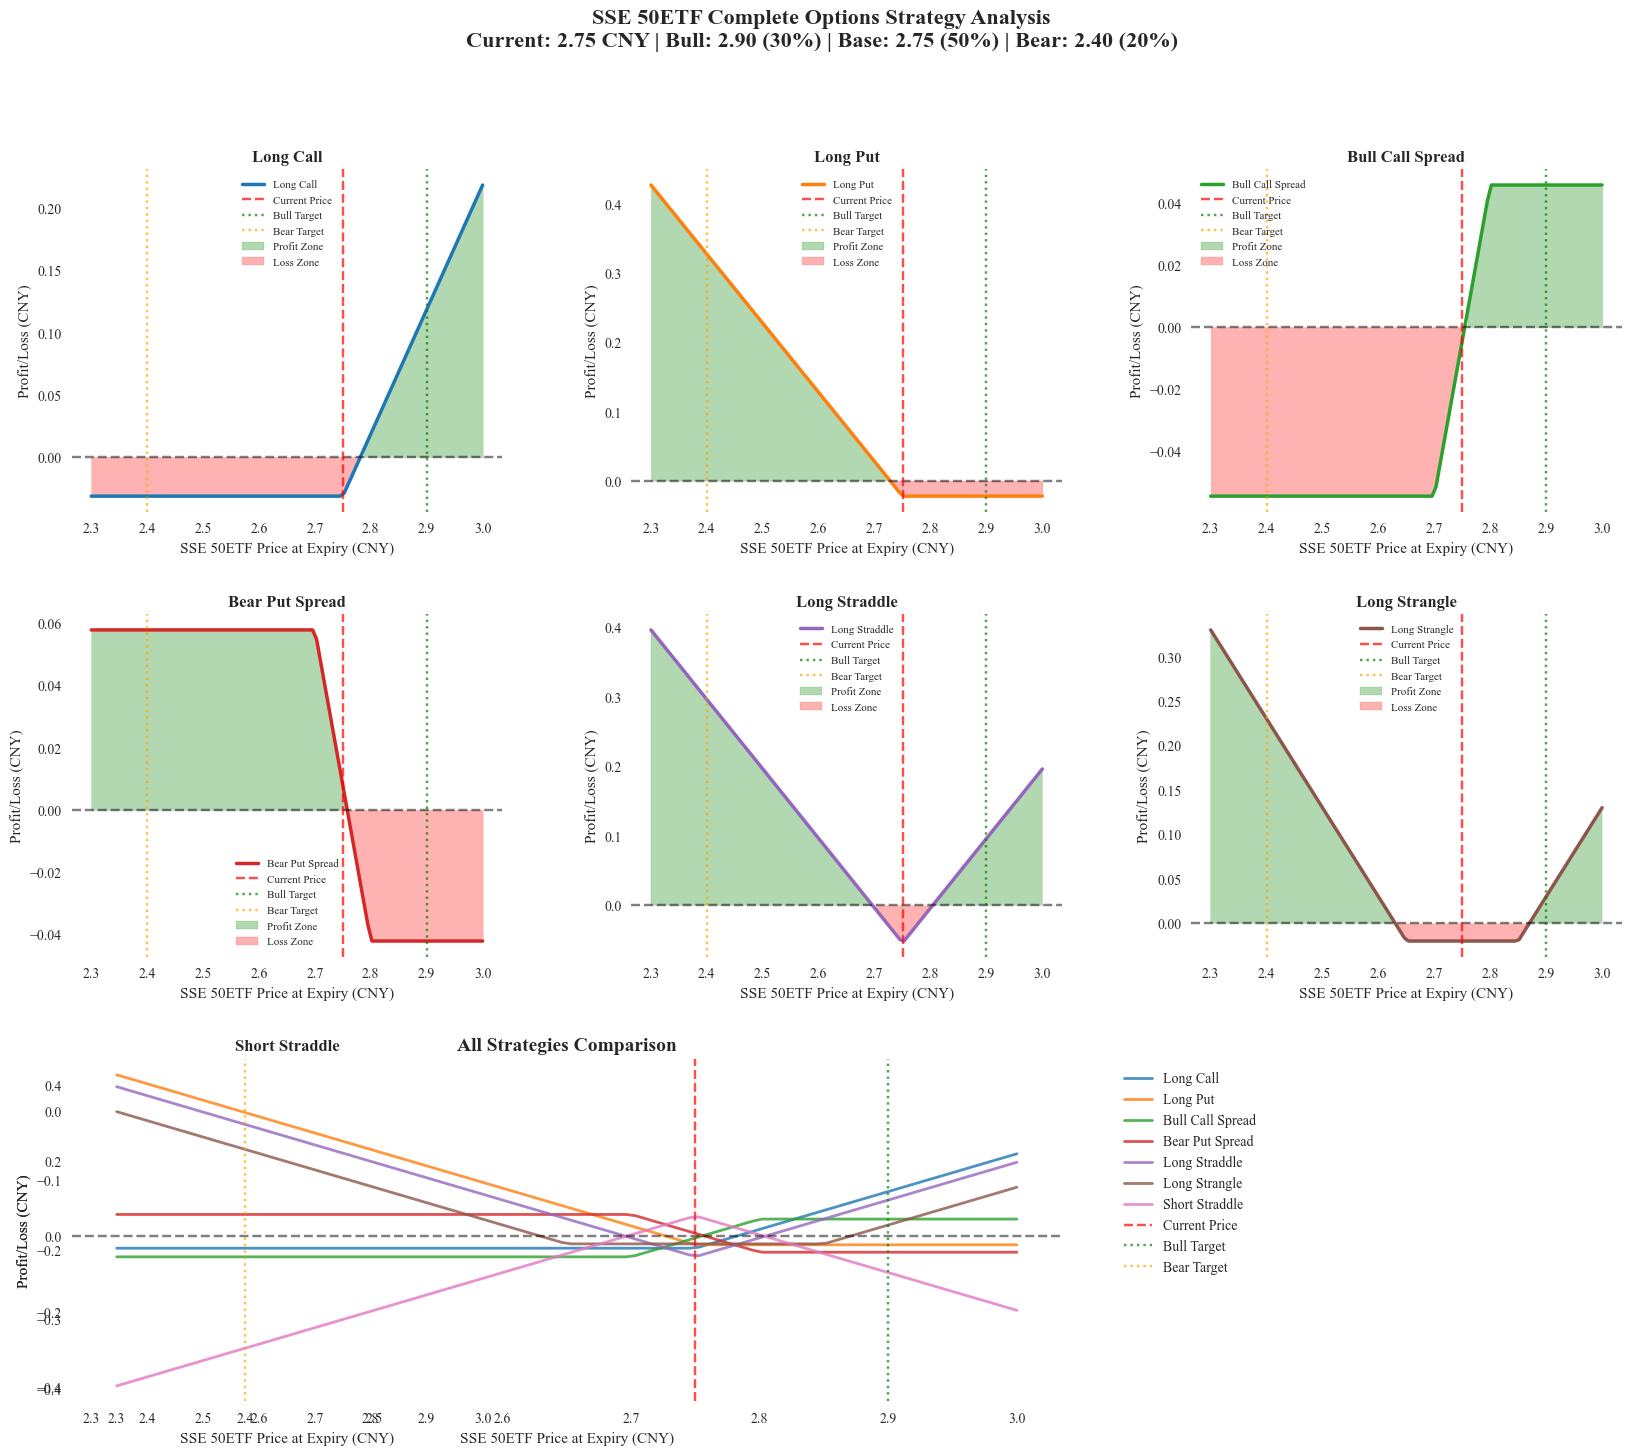


                              COMPREHENSIVE STRATEGY ANALYSIS
        Strategy  Initial Cost  Expected Return  Bull Scenario P&L  Base Scenario P&L  Bear Scenario P&L  Max Profit  Max Loss
       Long Call        0.0315           0.0135             0.1185            -0.0315            -0.0315      0.2185   -0.0315
        Long Put        0.0225           0.0475            -0.0225            -0.0225             0.3275      0.4275   -0.0225
Bull Call Spread        0.0544           0.0006             0.0456            -0.0044            -0.0544      0.0456   -0.0544
 Bear Put Spread        0.0421           0.0029            -0.0421             0.0079             0.0579      0.0579   -0.0421
   Long Straddle        0.0539           0.0611             0.0961            -0.0539             0.2961      0.3961   -0.0514
   Long Strangle        0.0200           0.0450             0.0300            -0.0200             0.2300      0.3300   -0.0200
  Short Straddle       -0.0539          -0.0611 

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Используем Times New Roman и белый фон
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['savefig.facecolor'] = 'white'

# Market data from analysis
current_price = 2.75
bull_target = 2.90
base_target = 2.75
bear_target = 2.40

# Probabilities
prob_bull = 0.30
prob_base = 0.50
prob_bear = 0.20

# Price range for analysis
price_range = np.linspace(2.30, 3.00, 100)

# Option pricing assumptions (simplified Black-Scholes estimates)
def estimate_option_price(strike, spot, option_type='call', volatility=0.0602, time_to_expiry=60/365, risk_free_rate=0.02):
    """Simplified option pricing for demonstration"""
    from scipy.stats import norm
    import math
    
    d1 = (math.log(spot/strike) + (risk_free_rate + 0.5 * volatility**2) * time_to_expiry) / (volatility * math.sqrt(time_to_expiry))
    d2 = d1 - volatility * math.sqrt(time_to_expiry)
    
    if option_type == 'call':
        price = spot * norm.cdf(d1) - strike * math.exp(-risk_free_rate * time_to_expiry) * norm.cdf(d2)
    else:  # put
        price = strike * math.exp(-risk_free_rate * time_to_expiry) * norm.cdf(-d2) - spot * norm.cdf(-d1)
    
    return max(price, 0.01)  # Minimum price of 0.01

# Calculate all option premiums
call_270_premium = estimate_option_price(2.70, 2.75, 'call')
call_275_premium = estimate_option_price(2.75, 2.75, 'call')
call_280_premium = estimate_option_price(2.80, 2.75, 'call')
call_285_premium = estimate_option_price(2.85, 2.75, 'call')

put_265_premium = estimate_option_price(2.65, 2.75, 'put')
put_270_premium = estimate_option_price(2.70, 2.75, 'put')
put_275_premium = estimate_option_price(2.75, 2.75, 'put')
put_280_premium = estimate_option_price(2.80, 2.75, 'put')

print("═══════════════════════════════════════════")
print("            OPTION PREMIUMS")
print("═══════════════════════════════════════════")
print(f"Call 2.70: {call_270_premium:.4f} CNY")
print(f"Call 2.75: {call_275_premium:.4f} CNY")
print(f"Call 2.80: {call_280_premium:.4f} CNY")
print(f"Call 2.85: {call_285_premium:.4f} CNY")
print(f"Put 2.65: {put_265_premium:.4f} CNY")
print(f"Put 2.70: {put_270_premium:.4f} CNY")
print(f"Put 2.75: {put_275_premium:.4f} CNY")
print(f"Put 2.80: {put_280_premium:.4f} CNY")

# Define all strategies
def long_call_payoff(prices, strike=2.75, premium=call_275_premium):
    return np.maximum(prices - strike, 0) - premium

def long_put_payoff(prices, strike=2.75, premium=put_275_premium):
    return np.maximum(strike - prices, 0) - premium

def bull_call_spread_payoff(prices, long_strike=2.70, short_strike=2.80):
    long_payoff = np.maximum(prices - long_strike, 0) - call_270_premium
    short_payoff = -(np.maximum(prices - short_strike, 0) - call_280_premium)
    return long_payoff + short_payoff

def bear_put_spread_payoff(prices, long_strike=2.80, short_strike=2.70):
    long_payoff = np.maximum(long_strike - prices, 0) - put_280_premium
    short_payoff = -(np.maximum(short_strike - prices, 0) - put_270_premium)
    return long_payoff + short_payoff

def long_straddle_payoff(prices, strike=2.75):
    call_payoff = np.maximum(prices - strike, 0) - call_275_premium
    put_payoff = np.maximum(strike - prices, 0) - put_275_premium
    return call_payoff + put_payoff

def long_strangle_payoff(prices, call_strike=2.85, put_strike=2.65):
    call_payoff = np.maximum(prices - call_strike, 0) - call_285_premium
    put_payoff = np.maximum(put_strike - prices, 0) - put_265_premium
    return call_payoff + put_payoff

def short_straddle_payoff(prices, strike=2.75):
    call_payoff = -(np.maximum(prices - strike, 0) - call_275_premium)
    put_payoff = -(np.maximum(strike - prices, 0) - put_275_premium)
    return call_payoff + put_payoff

# Calculate payoffs for all strategies
strategies = {
    'Long Call': long_call_payoff(price_range),
    'Long Put': long_put_payoff(price_range),
    'Bull Call Spread': bull_call_spread_payoff(price_range),
    'Bear Put Spread': bear_put_spread_payoff(price_range),
    'Long Straddle': long_straddle_payoff(price_range),
    'Long Strangle': long_strangle_payoff(price_range),
    'Short Straddle': short_straddle_payoff(price_range)
}

# Create comprehensive visualization
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Colors for strategies
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
strategy_names = list(strategies.keys())

# Individual strategy plots
for i, (name, payoffs) in enumerate(strategies.items()):
    row = i // 3
    col = i % 3
    ax = fig.add_subplot(gs[row, col])
    
    ax.plot(price_range, payoffs, color=colors[i], linewidth=2.5, label=name)
    ax.axhline(y=0, color='k', linestyle='--', alpha=0.5)
    ax.axvline(x=current_price, color='red', linestyle='--', alpha=0.7, label='Current Price')
    ax.axvline(x=bull_target, color='green', linestyle=':', alpha=0.7, label='Bull Target')
    ax.axvline(x=bear_target, color='orange', linestyle=':', alpha=0.7, label='Bear Target')
    
    # Fill profit/loss zones
    ax.fill_between(price_range, payoffs, 0, where=(payoffs > 0), 
                   color='green', alpha=0.3, label='Profit Zone')
    ax.fill_between(price_range, payoffs, 0, where=(payoffs < 0), 
                   color='red', alpha=0.3, label='Loss Zone')
    
    ax.set_title(f'{name}', fontweight='bold', fontsize=12)
    ax.set_xlabel('SSE 50ETF Price at Expiry (CNY)')
    ax.set_ylabel('Profit/Loss (CNY)')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8)

# Comparison plot
if len(strategies) > 6:
    ax_comp = fig.add_subplot(gs[2, 0:2])
else:
    ax_comp = fig.add_subplot(gs[2, 2])

for i, (name, payoffs) in enumerate(strategies.items()):
    ax_comp.plot(price_range, payoffs, color=colors[i], linewidth=2, 
                label=name, alpha=0.8)

ax_comp.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax_comp.axvline(x=current_price, color='red', linestyle='--', alpha=0.7, label='Current Price')
ax_comp.axvline(x=bull_target, color='green', linestyle=':', alpha=0.7, label='Bull Target')
ax_comp.axvline(x=bear_target, color='orange', linestyle=':', alpha=0.7, label='Bear Target')

ax_comp.set_title('All Strategies Comparison', fontweight='bold', fontsize=14)
ax_comp.set_xlabel('SSE 50ETF Price at Expiry (CNY)')
ax_comp.set_ylabel('Profit/Loss (CNY)')
ax_comp.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax_comp.grid(True, alpha=0.3)

plt.suptitle('SSE 50ETF Complete Options Strategy Analysis\nCurrent: 2.75 CNY | Bull: 2.90 (30%) | Base: 2.75 (50%) | Bear: 2.40 (20%)', 
             fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

# Calculate expected returns and scenario analysis
def calculate_scenario_payoffs(strategy_func, scenarios):
    payoffs = []
    for price, prob in scenarios:
        if strategy_func == long_call_payoff:
            payoff = long_call_payoff(np.array([price]))[0]
        elif strategy_func == long_put_payoff:
            payoff = long_put_payoff(np.array([price]))[0]
        elif strategy_func == bull_call_spread_payoff:
            payoff = bull_call_spread_payoff(np.array([price]))[0]
        elif strategy_func == bear_put_spread_payoff:
            payoff = bear_put_spread_payoff(np.array([price]))[0]
        elif strategy_func == long_straddle_payoff:
            payoff = long_straddle_payoff(np.array([price]))[0]
        elif strategy_func == long_strangle_payoff:
            payoff = long_strangle_payoff(np.array([price]))[0]
        else:  # short_straddle_payoff
            payoff = short_straddle_payoff(np.array([price]))[0]
        payoffs.append(payoff)
    return payoffs

scenarios = [(bull_target, prob_bull), (base_target, prob_base), (bear_target, prob_bear)]

# Calculate all metrics
strategy_functions = [
    long_call_payoff, long_put_payoff, bull_call_spread_payoff, 
    bear_put_spread_payoff, long_straddle_payoff, long_strangle_payoff, short_straddle_payoff
]

# Initial costs
initial_costs = [
    call_275_premium,  # Long Call
    put_275_premium,   # Long Put
    call_270_premium - call_280_premium,  # Bull Call Spread
    put_280_premium - put_270_premium,    # Bear Put Spread
    call_275_premium + put_275_premium,   # Long Straddle
    call_285_premium + put_265_premium,   # Long Strangle
    -(call_275_premium + put_275_premium) # Short Straddle
]

# Calculate scenario payoffs and expected returns
results = []
for i, (name, func) in enumerate(zip(strategy_names, strategy_functions)):
    scenario_payoffs = calculate_scenario_payoffs(func, scenarios)
    expected_return = sum(p * prob for (p, prob) in zip(scenario_payoffs, [prob_bull, prob_base, prob_bear]))
    
    results.append({
        'Strategy': name,
        'Initial Cost': initial_costs[i],
        'Expected Return': expected_return,
        'Bull Scenario P&L': scenario_payoffs[0],
        'Base Scenario P&L': scenario_payoffs[1],
        'Bear Scenario P&L': scenario_payoffs[2],
        'Max Profit': np.max(strategies[name]),
        'Max Loss': np.min(strategies[name])
    })

# Create comprehensive summary
summary_df = pd.DataFrame(results)

print("\n" + "="*100)
print("                              COMPREHENSIVE STRATEGY ANALYSIS")
print("="*100)
print(summary_df.round(4).to_string(index=False))

# Risk-Return Analysis
print(f"\n{'='*60}")
print("                    RISK-RETURN ANALYSIS")
print(f"{'='*60}")

for i, result in enumerate(results):
    roi = (result['Expected Return'] / abs(result['Initial Cost'])) * 100 if result['Initial Cost'] != 0 else 0
    print(f"{result['Strategy']:<20} | ROI: {roi:6.1f}% | Risk Level: ", end="")
    
    if result['Max Loss'] < -0.10:
        print("HIGH")
    elif result['Max Loss'] < -0.05:
        print("MEDIUM")
    else:
        print("LOW")

# Strategy recommendations based on market outlook
print(f"\n{'='*60}")
print("              STRATEGY RECOMMENDATIONS")
print(f"{'='*60}")

best_er_idx = np.argmax([r['Expected Return'] for r in results])
best_roi_idx = np.argmax([(r['Expected Return'] / abs(r['Initial Cost'])) * 100 
                         if r['Initial Cost'] != 0 else 0 for r in results])

print(f"Best Expected Return: {results[best_er_idx]['Strategy']} ({results[best_er_idx]['Expected Return']:.4f} CNY)")
print(f"Best ROI: {results[best_roi_idx]['Strategy']} ({(results[best_roi_idx]['Expected Return'] / abs(results[best_roi_idx]['Initial Cost'])) * 100:.1f}%)")

print(f"\nMarket Outlook Based Recommendations:")
print(f"• Bullish (expect rise to 2.90): Long Call or Bull Call Spread")
print(f"• Bearish (expect fall to 2.40): Long Put or Bear Put Spread") 
print(f"• High Volatility Expected: Long Straddle or Long Strangle")
print(f"• Low Volatility Expected: Short Straddle")
print(f"• Neutral with 50% base case: Short Straddle currently optimal")

# Breakeven analysis
print(f"\n{'='*60}")
print("                 BREAKEVEN ANALYSIS")
print(f"{'='*60}")

def find_breakevens(payoffs):
    breakevens = []
    for i in range(len(price_range)-1):
        if payoffs[i] * payoffs[i+1] < 0:  # Sign change
            # Linear interpolation for more precise breakeven
            be = price_range[i] - payoffs[i] * (price_range[i+1] - price_range[i]) / (payoffs[i+1] - payoffs[i])
            breakevens.append(be)
    return breakevens

for name, payoffs in strategies.items():
    breakevens = find_breakevens(payoffs)
    if breakevens:
        print(f"{name:<20}: {[round(x, 3) for x in breakevens]}")
    else:
        print(f"{name:<20}: No breakeven points")

print(f"\n{'='*60}")
print("                   FINAL RECOMMENDATION")
print(f"{'='*60}")
print("Given current market conditions:")
print("• Low volatility environment (6.02%)")
print("• 50% probability of staying at current price")
print("• Strong preference for premium collection strategies")
print(f"• RECOMMENDED: {results[best_er_idx]['Strategy']} for highest expected return")
print(f"• ALTERNATIVE: Bull Call Spread for limited risk bullish play")
print("• AVOID: Long options in low volatility unless strong directional conviction")